# Europe Energy Transition Tracker
## Notebook 01 — Data Exploration

Data Source: Eurostat (nrg_bal_peh)
Goal: Understand structure and prepare electricity generation data.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving eurostat_generation.csv to eurostat_generation (1).csv


In [3]:
import pandas as pd

df = pd.read_csv("eurostat_generation.csv")

df.head()


/tmp/ipython-input-31771255.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eurostat_generation.csv")


,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Batteries,Gigawatt-hour,Albania,2000,0.0,NaN,NaN
1,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Batteries,Gigawatt-hour,Albania,2001,0.0,NaN,NaN
2,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Batteries,Gigawatt-hour,Albania,2002,0.0,NaN,NaN
3,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Batteries,Gigawatt-hour,Albania,2003,0.0,NaN,NaN
4,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Batteries,Gigawatt-hour,Albania,2004,0.0,NaN,NaN


What energy sources exist?

In [4]:
sorted(df["siec"].unique())

['Additives and oxygenates (excluding biofuel portion)',
 'Ambient heat (heat pumps)',
 'Anthracite',
 'Aviation gasoline',
 'Batteries',
 'Bioenergy',
 'Biogases',
 'Bitumen',
 'Blast furnace gas',
 'Blended bio jet kerosene',
 'Blended biodiesels',
 'Blended biogasoline',
 'Brown coal briquettes',
 'Charcoal',
 'Coal tar',
 'Coke oven coke',
 'Coke oven gas',
 'Coking coal',
 'Crude oil',
 'Electricity',
 'Ethane',
 'Fossil energy',
 'Fuel oil',
 'Gas coke',
 'Gas oil and diesel oil (excluding biofuel portion)',
 'Gas works gas',
 'Gasoline-type jet fuel',
 'Geothermal',
 'Heat',
 'Hydro',
 'Industrial waste (non-renewable)',
 'Kerosene-type jet fuel (excluding biofuel portion)',
 'Lignite',
 'Liquefied petroleum gases',
 'Lubricants',
 'Manufactured gases',
 'Motor gasoline (excluding biofuel portion)',
 'Naphtha',
 'Natural gas',
 'Natural gas liquids',
 'Non-renewable municipal waste',
 'Non-renewable waste',
 'Nuclear heat',
 'Oil and petroleum products (excluding biofuel portion

How many countries?

In [5]:
len(df["geo"].unique())


41

In [6]:
sorted(df["geo"].unique())


['Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'European Union - 27 countries (from 2020)',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Kosovo*',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Türkiye',
 'Ukraine',
 'United Kingdom']

What years?

In [7]:
df["TIME_PERIOD"].min(), df["TIME_PERIOD"].max()


(2000, 2024)

Any missing values?

In [8]:
df["OBS_VALUE"].isna().sum()


np.int64(16038)

In [9]:
df[df["OBS_VALUE"].isna()].head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
17322,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Electricity,Gigawatt-hour,Albania,2000,NaN,m,NaN
17323,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Electricity,Gigawatt-hour,Albania,2001,NaN,m,NaN
17324,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Electricity,Gigawatt-hour,Albania,2002,NaN,m,NaN
17325,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Electricity,Gigawatt-hour,Albania,2003,NaN,m,NaN
17326,ESTAT:NRG_BAL_PEH(1.0),16/02/26 23:00:00,Annual,Gross electricity production,Electricity,Gigawatt-hour,Albania,2004,NaN,m,NaN


Which sources cause most of the missing values?

In [10]:
df[df["OBS_VALUE"].isna()]["siec"].value_counts()


,count
siec,
Electricity,941
Refinery feedstocks,941
Lubricants,941
Additives and oxygenates (excluding biofuel portion),941
Other hydrocarbons,941
Ethane,941
Aviation gasoline,941
Motor gasoline (excluding biofuel portion),941
Gasoline-type jet fuel,941


In [11]:
df_clean = df.copy()

df_clean["OBS_VALUE"] = df_clean["OBS_VALUE"].fillna(0)


In [12]:
#verify fix
df_clean["OBS_VALUE"].isna().sum()


np.int64(0)

In [13]:
#Creating a whitelist
sorted(df_clean["siec"].unique())

valid_sources = [
    "Hydro",
    "Wind",
    "Solar",
    "Nuclear heat",
    "Natural gas",
    "Solid fossil fuels",
    "Oil and petroleum products",
    "Primary solid biofuels",
    "Biogases",
    "Renewable municipal waste",
    "Non-renewable waste",
    "Geothermal",
    "Other fuels"
]

df_power = df_clean[df_clean["siec"].isin(valid_sources)].copy()
#check filtered dataset
df_power["siec"].unique()



array(['Solid fossil fuels', 'Natural gas', 'Nuclear heat',
       'Primary solid biofuels', 'Biogases', 'Hydro', 'Geothermal',
       'Wind', 'Non-renewable waste', 'Renewable municipal waste'],
      dtype=object)

In [14]:
#Mapping dictionary
energy_map = {
    "Solid fossil fuels": "Coal",
    "Natural gas": "Natural Gas",
    "Nuclear heat": "Nuclear",
    "Hydro": "Hydro",
    "Wind": "Wind",
    "Geothermal": "Geothermal",
    "Primary solid biofuels": "Bioenergy",
    "Biogases": "Bioenergy",
    "Renewable municipal waste": "Bioenergy",
    "Non-renewable waste": "Bioenergy"
}
df_power["energy_group"] = df_power["siec"].map(energy_map)
df_power["energy_group"].unique()


array(['Coal', 'Natural Gas', 'Nuclear', 'Bioenergy', 'Hydro',
       'Geothermal', 'Wind'], dtype=object)

In [15]:
import pandas as pd
import numpy as np

# --- Safety: make sure OBS_VALUE is numeric and missing -> 0
df_power["OBS_VALUE"] = pd.to_numeric(df_power["OBS_VALUE"], errors="coerce").fillna(0)

# --- 1) Aggregate: country-year-energy_group total generation (GWh)
df_grouped = (
    df_power
    .groupby(["geo", "TIME_PERIOD", "energy_group"], as_index=False)["OBS_VALUE"]
    .sum()
    .rename(columns={"OBS_VALUE": "generation_gwh"})
)

# --- 2) Total generation per country-year
totals = (
    df_grouped
    .groupby(["geo", "TIME_PERIOD"], as_index=False)["generation_gwh"]
    .sum()
    .rename(columns={"generation_gwh": "total_gwh"})
)

# --- 3) Add totals + compute share
df_grouped = df_grouped.merge(totals, on=["geo", "TIME_PERIOD"], how="left")
df_grouped["share"] = np.where(df_grouped["total_gwh"] > 0,
                               df_grouped["generation_gwh"] / df_grouped["total_gwh"],
                               0)

# --- 4) Pick dominant source per country-year
dominant_source = (
    df_grouped
    .sort_values(["geo", "TIME_PERIOD", "share"], ascending=[True, True, False])
    .groupby(["geo", "TIME_PERIOD"], as_index=False)
    .first()
)

dominant_source.head(20)


,geo,TIME_PERIOD,energy_group,generation_gwh,total_gwh,share
0,Albania,2000,Hydro,4594.000,4594.000,1.0
1,Albania,2001,Hydro,3555.000,3555.000,1.0
2,Albania,2002,Hydro,3512.000,3512.000,1.0
3,Albania,2003,Hydro,4885.000,4885.000,1.0
4,Albania,2004,Hydro,5466.000,5466.000,1.0
5,Albania,2005,Hydro,5373.000,5373.000,1.0
6,Albania,2006,Hydro,5431.000,5431.000,1.0
7,Albania,2007,Hydro,2788.000,2788.000,1.0
8,Albania,2008,Hydro,3797.000,3797.000,1.0
9,Albania,2009,Hydro,5201.000,5201.000,1.0


In [16]:
dominant_source["energy_group"].value_counts()


,count
energy_group,
Coal,248
Nuclear,227
Natural Gas,205
Hydro,196
Bioenergy,48
Wind,42


In [17]:
dominant_source[dominant_source["geo"].isin(
    ["France","Norway","Poland","Germany","United Kingdom","Spain"]
)].tail(20)


,geo,TIME_PERIOD,energy_group,generation_gwh,total_gwh,share
946,United Kingdom,2000,Natural Gas,148077.000,366272.000,0.404282
947,United Kingdom,2001,Natural Gas,141905.000,377949.077,0.375461
948,United Kingdom,2002,Natural Gas,152276.000,381041.342,0.399631
949,United Kingdom,2003,Natural Gas,148881.000,392066.407,0.379734
950,United Kingdom,2004,Natural Gas,157065.000,387799.926,0.405016
951,United Kingdom,2005,Natural Gas,152640.000,391308.538,0.390076
952,United Kingdom,2006,Coal,148850.000,389469.354,0.382187
953,United Kingdom,2007,Natural Gas,165793.000,390223.498,0.424867
954,United Kingdom,2008,Natural Gas,176219.000,380806.144,0.462753
955,United Kingdom,2009,Natural Gas,166499.000,369329.528,0.450814


In [18]:
#Numeric years
dominant_source["TIME_PERIOD"] = dominant_source["TIME_PERIOD"].astype(int)
timeline = dominant_source.pivot(
    index="geo",
    columns="TIME_PERIOD",
    values="energy_group"
)
timeline.head()



TIME_PERIOD,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
geo,,,,,,,,,,,,,,,,,,,,,
Albania,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,...,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,NaN
Austria,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,...,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro,Hydro
Belgium,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,...,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear,Nuclear
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Coal,Coal,Coal,Coal,Coal,Coal,Coal,Coal,Coal,Coal
Bulgaria,Nuclear,Nuclear,Nuclear,Coal,Coal,Nuclear,Nuclear,Coal,Coal,Coal,...,Coal,Coal,Coal,Coal,Coal,Nuclear,Coal,Coal,Nuclear,Nuclear


/tmp/ipython-input-3072446062.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_grid = timeline.replace(energy_to_num)


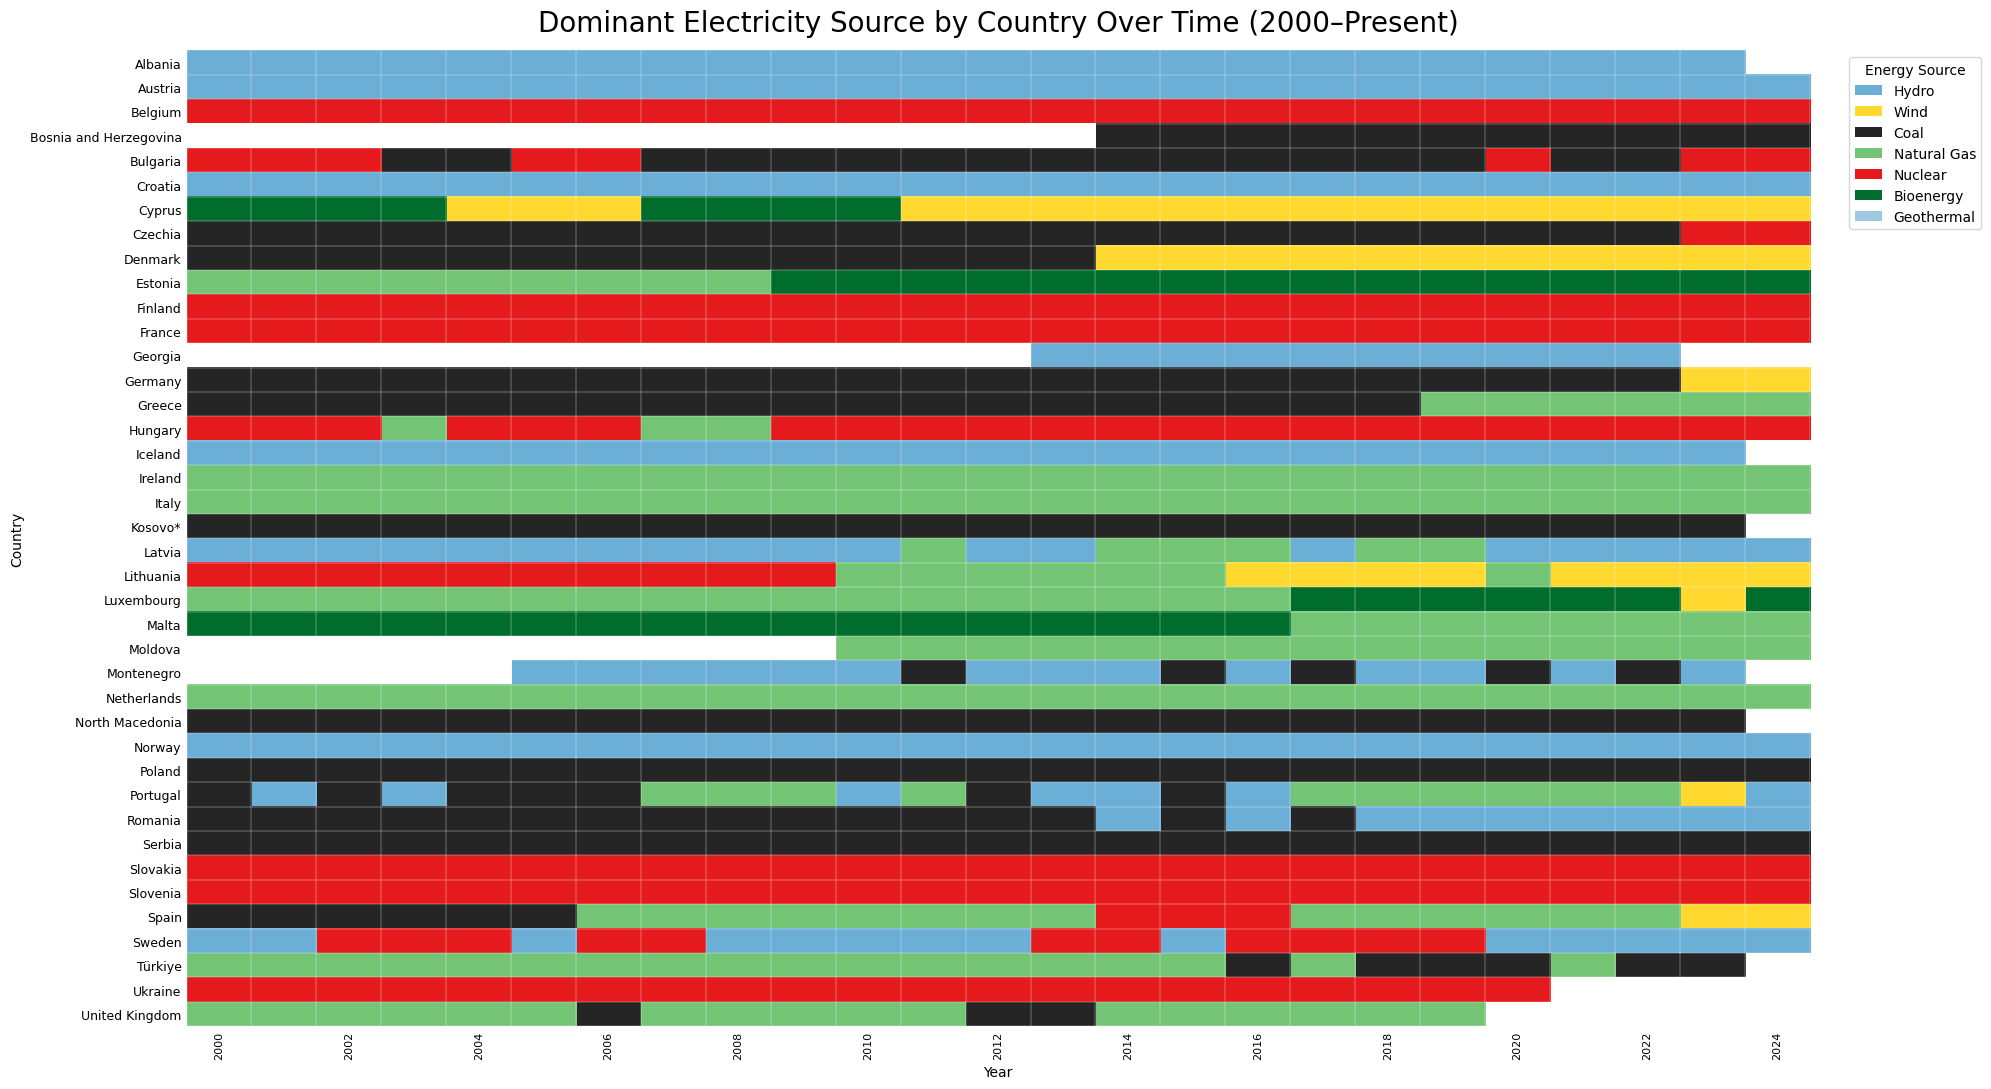

'figures/energy_transition_timeline_styled.png'

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# ---------- Settings ----------
TITLE = "Dominant Electricity Source by Country Over Time (2000–Present)"
OUTPATH = "figures/energy_transition_timeline_styled.png"

energy_order = ["Hydro", "Wind", "Coal", "Natural Gas", "Nuclear", "Bioenergy", "Geothermal"]
energy_colors = {
    "Hydro": "#6baed6",
    "Wind": "#ffd92f",
    "Coal": "#252525",
    "Natural Gas": "#74c476",
    "Nuclear": "#e41a1c",
    "Bioenergy": "#006d2c",
    "Geothermal": "#9ecae1"
}

# ---------- Build numeric grid ----------
energy_to_num = {k: i for i, k in enumerate(energy_order)}
numeric_grid = timeline.replace(energy_to_num)

drop_rows = [r for r in numeric_grid.index if "European Union" in str(r)]
numeric_grid = numeric_grid.drop(index=drop_rows, errors="ignore")

latest_year = numeric_grid.columns.max()
numeric_grid = numeric_grid.sort_values(by=[latest_year] if latest_year in numeric_grid.columns else None, kind="stable")
numeric_grid = numeric_grid.sort_index()  # comment this line out if you prefer the "sorted by latest" view above

cmap = ListedColormap([energy_colors[k] for k in energy_order])
norm = BoundaryNorm(np.arange(-0.5, len(energy_order) + 0.5, 1), cmap.N)

# ---------- Plot ----------
years = numeric_grid.columns.tolist()
countries = numeric_grid.index.tolist()

fig, ax = plt.subplots(figsize=(20, 11))
im = ax.imshow(numeric_grid.values, aspect="auto", cmap=cmap, norm=norm, interpolation="nearest")

# Title
ax.set_title(TITLE, fontsize=20, pad=14)
ax.set_ylabel("Country")
ax.set_xlabel("Year")

# X axis: show fewer year ticks so it’s readable
# show every 2nd year (change to 1, 5, etc. as you like)
step = 2
xticks = np.arange(0, len(years), step)
ax.set_xticks(xticks)
ax.set_xticklabels([years[i] for i in xticks], rotation=90, fontsize=8)

# Y axis: countries
ax.set_yticks(np.arange(len(countries)))
ax.set_yticklabels(countries, fontsize=9)

# Clean look: remove spines + tick marks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis="both", length=0)

# Add subtle separators (optional, makes it easier to track rows)
ax.set_xticks(np.arange(-.5, len(years), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(countries), 1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.25)
ax.tick_params(which="minor", bottom=False, left=False)

# Legend on the right
legend_elements = [Patch(facecolor=energy_colors[k], label=k) for k in energy_order]
ax.legend(
    handles=legend_elements,
    title="Energy Source",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=True
)

# Tight layout so legend fits
fig.tight_layout()

# ---------- Save ----------
os.makedirs("figures", exist_ok=True)
fig.savefig(OUTPATH, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

OUTPATH

## ENERGY EXPLORER

In [51]:
import os
import matplotlib.pyplot as plt

energy_colors = {
    "Hydro": "#6baed6",
    "Wind": "#ffd92f",
    "Coal": "#252525",
    "Natural Gas": "#74c476",
    "Nuclear": "#e41a1c",
    "Bioenergy": "#006d2c",
    "Geothermal": "#9ecae1"
}

energy_order = ["Hydro", "Wind", "Solar", "Coal", "Natural Gas", "Nuclear", "Bioenergy", "Geothermal"]

def plot_country_mix(df_grouped, country, outpath=None, use_shares=True, show=True):
    metric = "share" if use_shares else "generation_gwh"
    ylabel = "Share of Total Generation" if use_shares else "Electricity Generation (GWh)"

    d = df_grouped[df_grouped["geo"] == country].copy()
    if d.empty:
        raise ValueError(f"Country '{country}' not found. Try: sorted(df_grouped['geo'].unique())[:20]")

    mix = (
        d.pivot(index="TIME_PERIOD", columns="energy_group", values=metric)
         .fillna(0)
         .sort_index()
    )

    cols = [c for c in energy_order if c in mix.columns] + [c for c in mix.columns if c not in energy_order]
    mix = mix[cols]

    colors = [energy_colors.get(c, "#999999") for c in mix.columns]

    fig, ax = plt.subplots(figsize=(14, 7))
    mix.plot.area(ax=ax, color=colors, linewidth=0.6, alpha=0.95)

    ax.set_title(f"{country} Electricity Generation Mix (2000–Present)", fontsize=14, pad=12)
    ax.set_xlabel("Year")
    ax.set_ylabel(ylabel)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", alpha=0.2)

    ax.legend(
        title="Energy Source",
        ncol=2,
        frameon=False,
        bbox_to_anchor=(1.02, 1),
        loc="upper left"
    )

    plt.tight_layout()

    if outpath:
        folder = os.path.dirname(outpath)
        if folder:  # only create if there is a folder path
            os.makedirs(folder, exist_ok=True)
        fig.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")

    if show and not outpath:
        plt.show()

    plt.close(fig)


In [52]:
plot_country_mix(df_grouped, "Germany", outpath="figures/germany_energy_mix.png")

In [53]:
import re
import os

os.makedirs("figures", exist_ok=True)

# Pick a set (edit anytime)
highlight_countries = [
    "Germany", "France", "Norway", "Poland", "United Kingdom",
    "Spain", "Italy", "Netherlands", "Sweden", "Denmark"
]

available = set(df_grouped["geo"].unique())
selected = [c for c in highlight_countries if c in available]

# fallback if your geo values are codes or names differ
if not selected:
    selected = sorted(available)[:10]

for c in selected:
    safe = re.sub(r"[^a-z0-9_]+", "_", c.lower()).strip("_")
    out = f"figures/{safe}_energy_mix.png"
    plot_country_mix(df_grouped, c, outpath=out, use_shares=True, show=False)

selected


['Germany',
 'France',
 'Norway',
 'Poland',
 'United Kingdom',
 'Spain',
 'Italy',
 'Netherlands',
 'Sweden',
 'Denmark']

In [55]:
lines = ["## Country Mix Explorer (Examples)\n"]

for c in selected:
    safe = re.sub(r"[^a-z0-9_]+", "_", c.lower()).strip("_")
    lines.append(f"### {c}\n")
    lines.append(f"![{c} Mix](figures/{safe}_energy_mix.png)\n")

print("\n".join(lines))


## Country Mix Explorer (Examples)

### Germany

![Germany Mix](figures/germany_energy_mix.png)

### France

![France Mix](figures/france_energy_mix.png)

### Norway

![Norway Mix](figures/norway_energy_mix.png)

### Poland

![Poland Mix](figures/poland_energy_mix.png)

### United Kingdom

![United Kingdom Mix](figures/united_kingdom_energy_mix.png)

### Spain

![Spain Mix](figures/spain_energy_mix.png)

### Italy

![Italy Mix](figures/italy_energy_mix.png)

### Netherlands

![Netherlands Mix](figures/netherlands_energy_mix.png)

### Sweden

![Sweden Mix](figures/sweden_energy_mix.png)

### Denmark

![Denmark Mix](figures/denmark_energy_mix.png)

